1) Design model (input, output size, forward pass)
2) Construct loss and optimizer
3) Training Loop:
     - forward pass: compute gradient
     - backward pass: gradients
     - update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape
input_size = n_features
output_size = 1

# precision for loss loss
EPS = 1e-09

epoch 1: w = 0.669, loss = 5820.89013672
epoch 11: w = 12.704, loss = 4311.31445312
epoch 21: w = 22.960, loss = 3219.61621094
epoch 31: w = 31.700, loss = 2429.24707031
epoch 41: w = 39.150, loss = 1856.44934082
epoch 51: w = 45.501, loss = 1440.93701172
epoch 61: w = 50.918, loss = 1139.25683594
epoch 71: w = 55.537, loss = 920.04711914
epoch 81: w = 59.477, loss = 760.64447021
epoch 91: w = 62.839, loss = 644.65270996


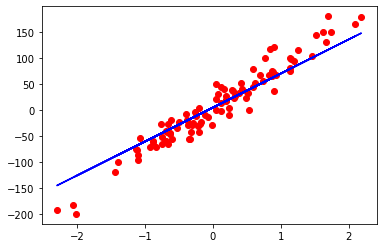

In [3]:
# 1) Model
learning_rate = 0.01
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_iters = 100
# 3) Training loop
for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss 
    l = loss(y_pred, y)
    
    # gradients = backward pass
    l.backward() # dLoss/dw
    
    # update weights
    optimizer.step()
    
    # remember to empty gradients for next calculation
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l.item():.8f}')
    
    # break if loss is too small that it's negligible
    if l < EPS:
        break

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()